### Notebook for EDA on solution portal analysis
#### Several columns are transformed using one hot encoding which is suitable for statistical analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
### TODO Add your file path ###
file_path = '../'
file_path_2 = '../Figures_ver8/'
#File that was extracted from the big database having only labelled data. Relevant = 1 means relevant.
file_name = 'aaa_solution_export 20231029.xlsx'
#file_name = 'local and indenous knowledge_analyses.xlsx'
df = pd.read_excel(file_path + file_name)

In [3]:
df.drop(['Name','Email address','Contributors','Acknowledgments','Contacts of key institutional partners involved with the solution planning and implementation',
         'Is there anything you would like to add with respect to CCA in mountains?'], inplace=True, axis=1)

In [4]:
df.replace('Other (Specify)','Others',inplace=True)

In [5]:
df.replace('Other (specify)','Others',inplace=True)

In [6]:
df.replace('Other (Please specify)','Others',inplace=True)

In [7]:
df.replace('Other (please specify)','Others',inplace=True)

In [8]:
df.replace(to_replace='GLOF(glacial lake outburst floods)', value='GLOF',inplace=True)

In [9]:
df.replace(to_replace='Natural snow scarcity (frequency of “bad winters”)', value='Scarcity of natural snow',inplace=True)

In [10]:
df.replace(to_replace='GLOF (glacial lake outburst floods)', value='GLOF',inplace=True)

In [11]:
df.replace(to_replace='Periods with low temperatures (frost) and intense rainfall.', value='Low temperature and intense rainfall',inplace= True)

In [12]:
df.replace(to_replace='Glacial Lake Outburst Floods', value='GLOF',inplace= True)

In [13]:
df.replace(to_replace='Increasing temperature (impacts on precipitation type snowfall vs. rainfall and on snow production capabilities)', 
           value='Increasing temperature',inplace= True)

In [14]:
df.replace(to_replace='soil erosion', value='erosion',inplace=True)

In [97]:
#df2 =df.iloc[:, np.r_[0:5, 6, 10, 12,14,16,18,20,21,23,32,33]].applymap(lambda s: s.lower() if type(s) == str else s)

In [144]:
del df2

In [15]:
df2 = df[['Title', 'Body','Solution location','Was the solution implemented in more than one country?',
    'What were the other countries?', 'Mountain range', 'Solution scale',
       'Mountain ecosystem type(s)', 'Solution type(s)', 'Sectors',
       'Climate impact(s) addressed', 'Climate impact time-scale(s)',
       'Main benefit associated with the solution implementation',
       'Co-benefits(s) associated with the solution implementation','Performance evaluation','Sendai Framework targets addressed',
       'Sustainable development goals addressed (1 – 17)',
       'Long term project sustainability and maintenance']]

In [16]:
#Make sure to remove in excel all spaces like: landslides, floods becomes landslides,floods otherwise sep=', '
#but it can be messy
#df = pd.concat([df, df['Mountain Range'].str.get_dummies(sep=',').rename(lambda x: 'Mountain Range:' + x, axis=1)], axis = 1).drop('Mountain Range', 1)
df2 = pd.concat([df2, df2['Solution scale'].str.get_dummies(sep=';;').rename(lambda x: 'Solution scale:' + x, axis=1)], axis = 1).drop('Solution scale', 1)
df2 = pd.concat([df2, df2['Mountain ecosystem type(s)'].str.get_dummies(sep=';;').rename(lambda x: 'Ecosystem:' + x, axis=1)], axis = 1).drop('Mountain ecosystem type(s)', 1)
df2 = pd.concat([df2, df2['Climate impact(s) addressed'].str.get_dummies(sep=';;').rename(lambda x: 'Climate Impact:' + x, axis=1)], axis = 1).drop('Climate impact(s) addressed', 1)
df2 = pd.concat([df2, df2['Sectors'].str.get_dummies(sep=';;').rename(lambda x: 'Sector:' + x, axis=1)], axis = 1).drop('Sectors', 1)
df2 = pd.concat([df2, df2['Solution type(s)'].str.get_dummies(sep=';;').rename(lambda x: 'Solution type:' + x, axis=1)], axis = 1).drop('Solution type(s)', 1)
df2 = pd.concat([df2, df2['Main benefit associated with the solution implementation'].str.get_dummies().rename(lambda x: 'Benefits:' + x, axis=1)], axis = 1).drop('Main benefit associated with the solution implementation', 1)
df2 = pd.concat([df2, df2['Co-benefits(s) associated with the solution implementation'].str.get_dummies(sep=';;').rename(lambda x: 'Co-benefits:' + x, axis=1)], axis = 1).drop('Co-benefits(s) associated with the solution implementation', 1)
df2 = pd.concat([df2, df2['Sendai Framework targets addressed'].str.get_dummies(sep=';;').rename(lambda x: x[0:8], axis=1)], axis = 1).drop('Sendai Framework targets addressed', 1)
df2 = pd.concat([df2, df2['Sustainable development goals addressed (1 – 17)'].str.get_dummies(sep=';;').rename(lambda x: 'SDG' + x[5:8], axis=1)], axis = 1).drop('Sustainable development goals addressed (1 – 17)', 1)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_40702/1968158546.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = pd.concat([df2, df2['Solution scale'].str.get_dummies(sep=';;').rename(lambda x: 'Solution scale:' + x, axis=1)], axis = 1).drop('Solution scale', 1)
/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_40702/1968158546.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = pd.concat([df2, df2['Mountain ecosystem type(s)'].str.get_dummies(sep=';;').rename(lambda x: 'Ecosystem:' + x, axis=1)], axis = 1).drop('Mountain ecosystem type(s)', 1)
/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_40702/1968158546.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = pd.concat([df2,

In [20]:
#df2.columns = df2.columns.str.replace('SDG:goal ', 'SDG')

In [17]:
df2.rename(columns = {'SDG1: ':'SDG 1', 'SDG2: ':'SDG 2', 'SDG3: ':'SDG 3', 'SDG4: ':'SDG 4',
                    'SDG5: ':'SDG 5', 'SDG6: ':'SDG 6', 'SDG7: ':'SDG 7', 'SDG8: ':'SDG 8','SDG9: ':'SDG 9', 
                   'SDG10:': 'SDG 10','SDG11:': 'SDG 11', 'SDG12:': 'SDG 12', 'SDG13:': 'SDG 13',
                   'SDG15:': 'SDG 15','SDG16:': 'SDG 16', 'SDG17:': 'SDG 17'}, inplace = True)

In [18]:
#df2.columns = df2.columns.str.replace('Sendai Target:', 'Sendai target')
df2.rename(columns = {'None':'No Sendai target', 'TARGET 1':'Sendai target A', 'TARGET 2':'Sendai target B', 'TARGET 3':'Sendai target C',
                      'TARGET 4':'Sendai target D','TARGET 5':'Sendai target E','TARGET 6':'Sendai target F',
                      'TARGET 7':'Sendai target G'}, inplace = True)

In [19]:
# remove other, others and other (please specify)
df2.drop(list(df2.filter(regex='Others|Other (Specify)|Other')),axis = 1,inplace = True)

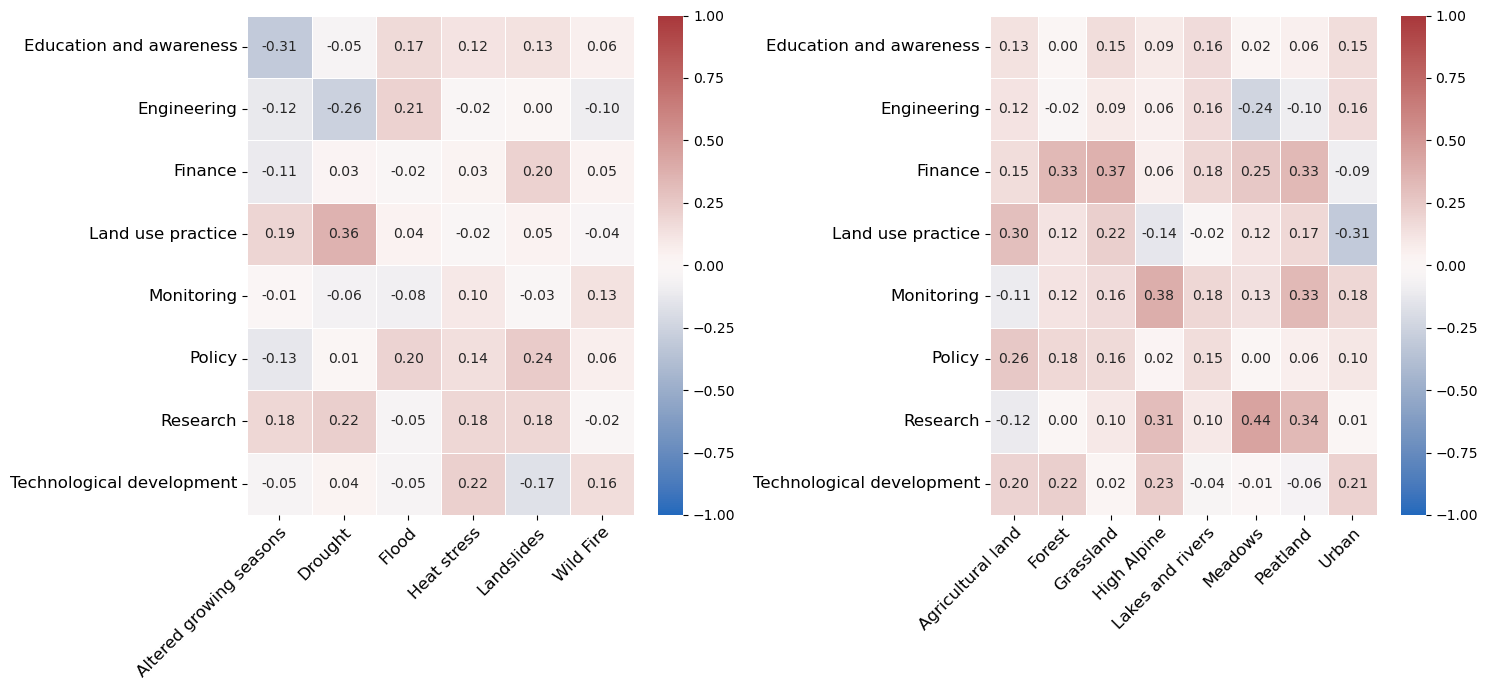

In [21]:
fig, axes = plt.subplots(ncols = 2, figsize = (15,7))
split_character = ":"
df_new = df2.loc[:, (df2.columns.str.startswith('Climate Impact:')) | (df2.columns.str.startswith('Solution type:'))].corr(method='spearman')
x0 = df_new.loc[df_new.index.str.startswith('Solution type:'),df_new.columns.str.startswith('Climate Impact:')]
x0.columns = x0.columns.str.split(split_character).str[-1]
x0.index = x0.index.str.split(split_character).str[-1]
x0.head()

del df_new

df_new = df2.loc[:, (df2.columns.str.startswith('Solution type:')) | (df2.columns.str.startswith('Ecosystem:'))].corr(method='spearman')
x1 = df_new.loc[df_new.index.str.startswith('Solution type:'),df_new.columns.str.startswith('Ecosystem:')]
x1.columns = x1.columns.str.split(split_character).str[-1]
x1.index = x1.index.str.split(split_character).str[-1]


#First plot
sns_a = sns.heatmap(x0,ax=axes[0], linewidths=.5,annot = True,fmt=".2f",cmap=sns.color_palette("vlag",as_cmap=True),vmin = -1,vmax = 1)
sns_a.set_xticklabels(labels = sns_a.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_a.tick_params(axis='both', labelsize=12)
#sns_a.set_title("Correlation climate impacts and solutions")

#Second plot
sns_c = sns.heatmap(x1,ax=axes[1], linewidths=.5, annot = True,fmt=".2f",cmap=sns.color_palette("vlag",as_cmap=True),vmin = -1,vmax = 1)
sns_c.set_xticklabels(labels = sns_c.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_c.tick_params(axis='both', labelsize=12)
#sns_c.set_title("Correlation ecosystems and solutions")
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()

figure_name = 'Correlations2'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', transparent = True, 
            facecolor ="w", 
            edgecolor ='w', dpi = 400)
del fig, axes

In [44]:
def pvalues_spearman(df,string1,string2):

    import pandas as pd
    from scipy.stats import spearmanr

    # Assuming df2 is your original DataFrame with the appropriate column names

    # Calculate the Spearman correlation matrix
    df_new = df.loc[:, (df.columns.str.startswith(string1)) | (df.columns.str.startswith(string2))].corr(method='spearman')

    # Select columns and indices that correspond to 'Solution type:' and 'Climate Impact:'
    impact_cols = df_new.columns[df_new.columns.str.startswith(string1)]
    solution_cols = df_new.index[df_new.index.str.startswith(string2)]

    # Initialize a DataFrame to hold the p-values, with rows as 'Solution type:' and columns as 'Climate Impact:'
    p_values = pd.DataFrame(index=solution_cols, columns=impact_cols, dtype=float)

    # Calculate Spearman p-values for each pair of 'Solution type:' and 'Climate Impact:' variables
    for sol_col in solution_cols:
        for imp_col in impact_cols:
            # Calculate the Spearman correlation coefficient and p-value
            spearman_result = spearmanr(df2[sol_col], df2[imp_col])
            # Fill the p-values DataFrame with the calculated p-value
            p_values.at[sol_col, imp_col] = spearman_result.pvalue

    # Remove the prefixes from the column names for better presentation
    p_values.columns = [col.split(':')[1] for col in p_values.columns]
    p_values.index = [idx.split(':')[1] for idx in p_values.index]
    return p_values

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

climate_impact_cols = df2.filter(regex='^Climate Impact:').columns
solution_type_cols = df2.filter(regex='^Solution type:').columns
ecosystems_type_cols = df2.filter(regex='^Ecosystem:').columns

# Initialize a DataFrame to store the counts
co_occurrence_counts = pd.DataFrame(index=solution_type_cols, columns=climate_impact_cols, dtype=int)
co_occurrence_counts_1 = pd.DataFrame(index=solution_type_cols, columns=ecosystems_type_cols, dtype=int)

# Calculate the count of co-occurrences where both columns are 1
for solution_col in solution_type_cols:
    for climate_col in climate_impact_cols:
        # Logical AND between the two binary columns to find where both are 1
        count = (df2[solution_col].eq(1) & df2[climate_col].eq(1)).sum()
        co_occurrence_counts.loc[solution_col, climate_col] = count

        # Calculate the count of co-occurrences where both columns are 1
for solution_col in solution_type_cols:
    for ecosystem_col in ecosystems_type_cols:
        # Logical AND between the two binary columns to find where both are 1
        count = (df2[solution_col].eq(1) & df2[ecosystem_col].eq(1)).sum()
        co_occurrence_counts_1.loc[solution_col, ecosystem_col] = count
        

# Remove the 'Climate Impact:' and 'Solution type:' prefixes for better display in the heatmap
co_occurrence_counts.columns = co_occurrence_counts.columns.str.replace('Climate Impact:', '', regex=False)
co_occurrence_counts.index = co_occurrence_counts.index.str.replace('Solution type:', '', regex=False)

# Remove the 'Ecosystem:' and 'Solution type:' prefixes for better display in the heatmap
co_occurrence_counts_1.columns = co_occurrence_counts_1.columns.str.replace('Ecosystem:', '', regex=False)
co_occurrence_counts_1.index = co_occurrence_counts_1.index.str.replace('Solution type:', '', regex=False)


# Plotting the heatmap
#fig, ax = plt.subplots(figsize=(15, 7))
#sns.heatmap(co_occurrence_counts, annot=True, cmap='Blues', ax=ax)
#ax.set_title('Number of Co-occurrences of Solution Types and Climate Impacts')
#plt.show()

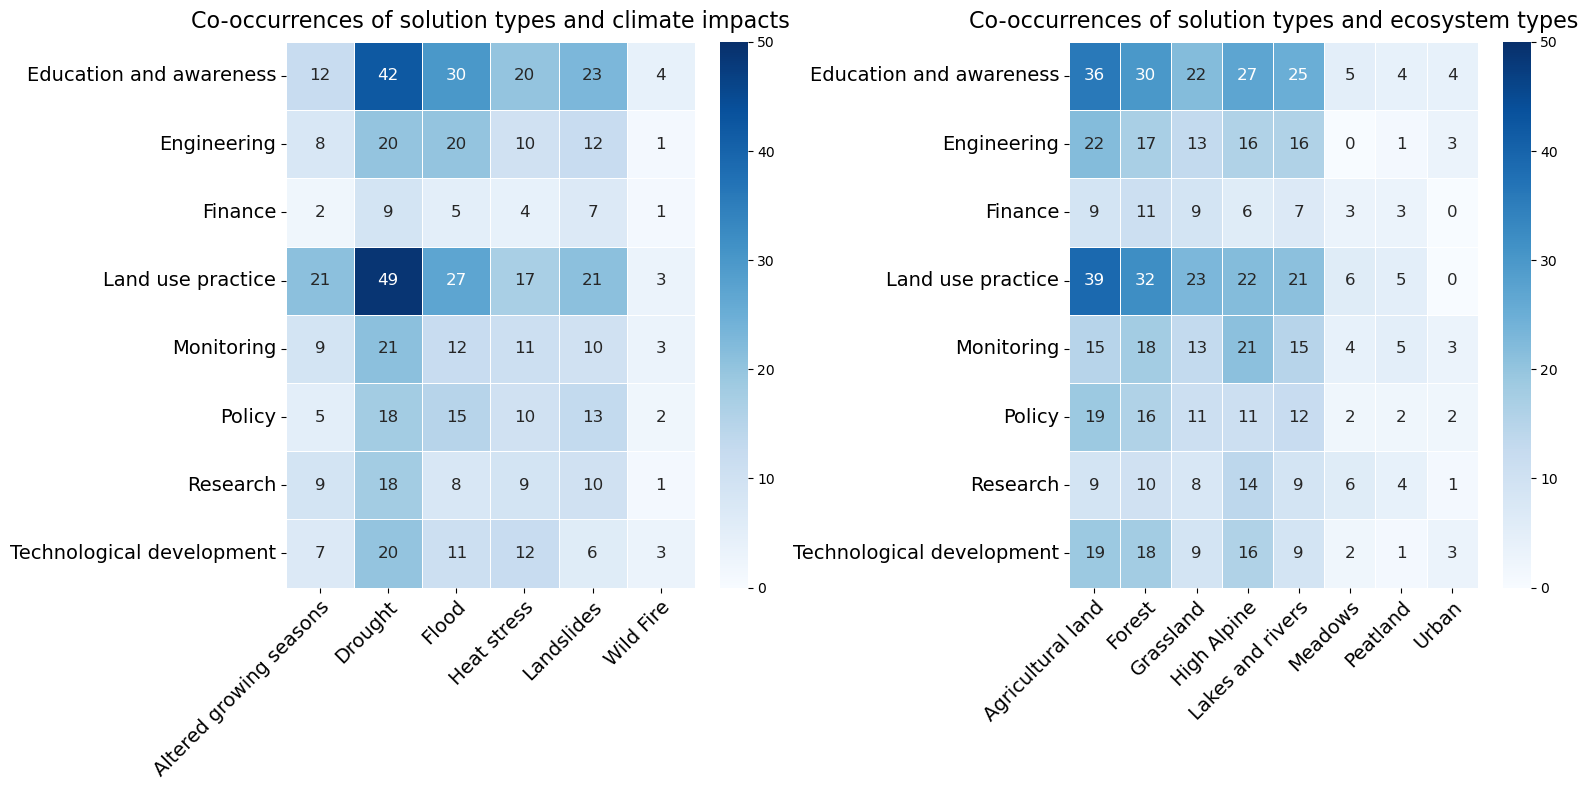

In [29]:
fig, axes = plt.subplots(ncols = 2, figsize = (16,8))

#First plot
sns_a = sns.heatmap(co_occurrence_counts,ax=axes[0], linewidths=.5,annot = True,annot_kws={"fontsize":12},cmap=sns.color_palette("Blues",as_cmap=True),vmin = 0,vmax = 50)
sns_a.set_xticklabels(labels = sns_a.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_a.tick_params(axis='both', labelsize=14)
sns_a.set_title('Co-occurrences of solution types and climate impacts',fontsize = 16, pad=10)

#Second plot
sns_b = sns.heatmap(co_occurrence_counts_1,ax=axes[1], linewidths=.5,annot = True, annot_kws={"fontsize":12},cmap=sns.color_palette("Blues",as_cmap=True),vmin = 0,vmax = 50)
sns_b.set_xticklabels(labels = sns_b.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_b.tick_params(axis='both', labelsize=14)
sns_b.set_title('Co-occurrences of solution types and ecosystem types',fontsize = 16, pad=10)

fig.subplots_adjust(wspace=0.4)
plt.tight_layout()

figure_name = 'Co-occurrence'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', transparent = True, 
            facecolor ="w", 
            edgecolor ='w', dpi = 400)
del fig, axes

In [94]:
co_occurrence_counts_1

,Agricultural land,Forest,Grassland,High Alpine,Lakes and rivers,Meadows,Peatland,Urban
Education and awareness,36.0,30.0,22.0,27.0,25.0,5.0,4.0,4.0
Engineering,22.0,17.0,13.0,16.0,16.0,0.0,1.0,3.0
Finance,9.0,11.0,9.0,6.0,7.0,3.0,3.0,0.0
Land use practice,39.0,32.0,23.0,22.0,21.0,6.0,5.0,0.0
Monitoring,15.0,18.0,13.0,21.0,15.0,4.0,5.0,3.0
Policy,19.0,16.0,11.0,11.0,12.0,2.0,2.0,2.0
Research,9.0,10.0,8.0,14.0,9.0,6.0,4.0,1.0
Technological development,19.0,18.0,9.0,16.0,9.0,2.0,1.0,3.0


In [45]:
p_climate_solution = pvalues_spearman(df2,'Climate Impact:','Solution type:')

In [50]:
p_climate_solution

,Altered growing seasons,Drought,Flood,Heat stress,Landslides,Wild Fire
Education and awareness,0.003708,0.632781,0.118946,0.259336,0.223717,0.564336
Engineering,0.268952,0.014296,0.049786,0.872542,0.975364,0.358021
Finance,0.298132,0.781157,0.844501,0.760267,0.057566,0.673708
Land use practice,0.077695,0.000520,0.701209,0.832418,0.675787,0.733640
Monitoring,0.938859,0.560182,0.440569,0.373668,0.791991,0.237285
Policy,0.220949,0.957860,0.063254,0.179673,0.025554,0.559299
Research,0.086664,0.038190,0.662723,0.086664,0.089645,0.882574
Technological development,0.625280,0.734729,0.657563,0.042026,0.120856,0.146583


In [51]:
p_ecosystem_solution = pvalues_spearman(df2,'Ecosystem:','Solution type:')

In [57]:
with pd.ExcelWriter("../Figures_ver8/p_values.xlsx") as writer:
    p_climate_solution.to_excel(writer,sheet_name='Climate_Solutions')
    p_ecosystem_solution.to_excel(writer,sheet_name='Ecosystems_Impacts')

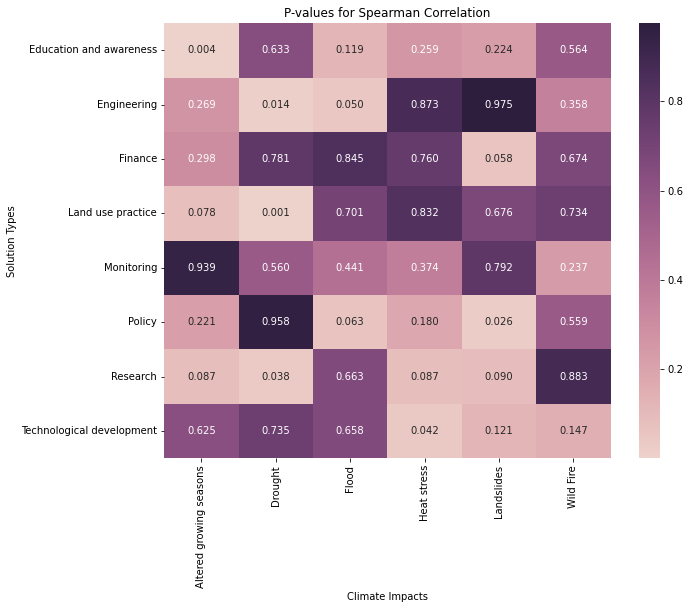

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming p_values is the DataFrame containing the p-values from the Spearman correlation tests
# which you obtained from running the previous code

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(p_climate_solution, annot=True, fmt=".3f", cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

# Set titles and labels (might change depending on your actual columns)
ax.set_title('P-values for Spearman Correlation')
ax.set_xlabel('Climate Impacts')
ax.set_ylabel('Solution Types')

# Show the heatmap
plt.show()

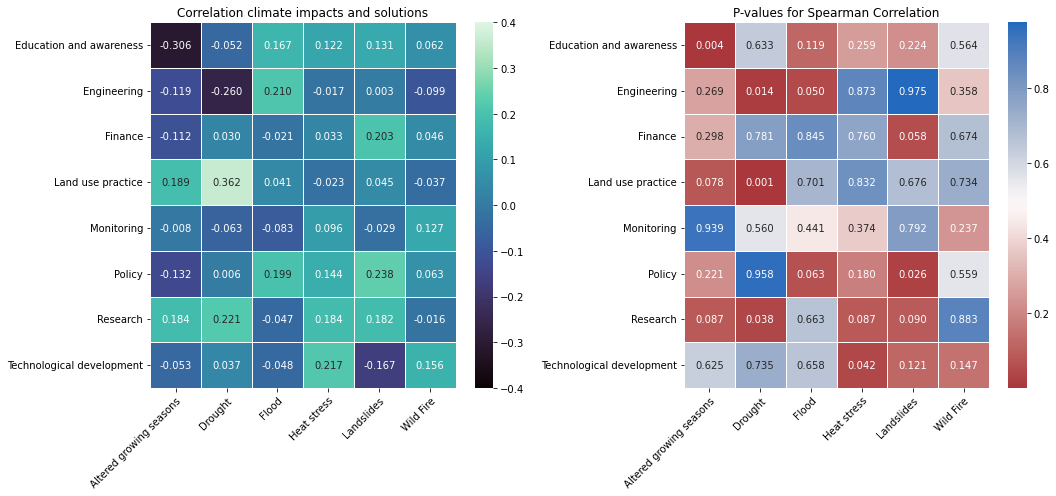

In [69]:
fig, axes = plt.subplots(ncols = 2, figsize = (15,7))
split_character = ":"
df_new = df2.loc[:, (df2.columns.str.startswith('Climate Impact:')) | (df2.columns.str.startswith('Solution type:'))].corr(method='spearman')
x0 = df_new.loc[df_new.index.str.startswith('Solution type:'),df_new.columns.str.startswith('Climate Impact:')]
x0.columns = x0.columns.str.split(split_character).str[-1]
x0.index = x0.index.str.split(split_character).str[-1]

x1 = p_climate_solution


del df_new

#Coefficient plot
sns_a = sns.heatmap(x0,ax=axes[0], linewidths=.5,annot = True,fmt=".3f",cmap=sns.color_palette("mako",as_cmap=True),vmin = -0.4,vmax = 0.4)
sns_a.set_xticklabels(labels = sns_a.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_a.tick_params(axis='both', labelsize=10)
sns_a.set_title("Correlation climate impacts and solutions")


#Pvalues plot
sns_c = sns.heatmap(x1,ax=axes[1], linewidths=.5, annot = True,fmt=".3f",cmap=sns.color_palette("",as_cmap=True))
sns_c.set_xticklabels(labels = sns_c.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns_c.tick_params(axis='both', labelsize=10)
sns_c.set_title('P-values for Spearman Correlation')
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()
# Show the heatmap
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'df' is your Pandas DataFrame with some numeric columns
df = pd.DataFrame({
    'A': [...], # some numeric data
    'B': [...], # some numeric data
    # ... possibly more columns
})
split_character = ":"
df_new = df2.loc[:, (df2.columns.str.startswith('Climate Impact:')) | (df2.columns.str.startswith('Solution type:'))]



# This will compute the Spearman correlation matrix with Pandas
spearman_correlation_matrix = df.corr(method='spearman')

# Initialize empty DataFrame to store p-values
p_values = pd.DataFrame(index=df.columns, columns=df.columns)

# Fill the DataFrame with p-values
for col1 in df.columns:
    for col2 in df.columns:
        # Avoid repeated calculations and self-correlation
        if col1 == col2 or pd.notnull(p_values.at[col1, col2]):
            continue
        # Perform Spearman correlation test
        corr_test = spearmanr(df[col1], df[col2])
        p_values.at[col1, col2] = corr_test.pvalue
        p_values.at[col2, col1] = corr_test.pvalue

# Print the Spearman correlation matrix
print("Spearman Correlation Matrix:\n", spearman_correlation_matrix)

# Print the matrix of p-values
print("\nP-Values Matrix:\n", p_values)

In [80]:
df2.drop(['Sendai Target:'],inplace=True, axis=1)

In [76]:
c = ['red', 'goldenrod', 'forestgreen', 'darkred', 'orangered', 'deepskyblue', 'gold','brown', 'darkorange',
    'deeppink', 'orange','darkgoldenrod','darkgreen', 'limegreen', 'royalblue', 'navy']

In [204]:
df2.columns

Index(['Title', 'Body', 'Solution location',
       'Was the solution implemented in more than one country?',
       'What were the other countries?', 'Mountain range',
       'Climate impact time-scale(s)', 'Performance evaluation',
       'Long term project sustainability and maintenance',
       'Solution scale:Global', 'Solution scale:Local',
       'Solution scale:National', 'Solution scale:Sub-national / Regional',
       'Solution scale:Trans-Boundary', 'Ecosystem:Agricultural land',
       'Ecosystem:Forest', 'Ecosystem:Grassland', 'Ecosystem:High Alpine',
       'Ecosystem:Lakes and rivers', 'Ecosystem:Meadows', 'Ecosystem:Peatland',
       'Ecosystem:Urban', 'Climate Impact:Altered growing seasons',
       'Climate Impact:Drought', 'Climate Impact:Flood',
       'Climate Impact:Heat stress', 'Climate Impact:Landslides',
       'Climate Impact:Wild Fire', 'Sector:Agriculture',
       'Sector:Basic Infrastructure', 'Sector:Ecosystems Biodiversity',
       'Sector:Forestry', 'Se

In [152]:
df_UN = df2[['No Sendai target', 'Sendai target A','Sendai target B', 'Sendai target C', 'Sendai target D',
       'Sendai target E', 'Sendai target F', 'Sendai target G', 'SDG 1', 'SDG 2', 'SDG 3',
       'SDG 4', 'SDG 5', 'SDG 6', 'SDG 7', 'SDG 8', 'SDG 9', 'SDG 10',
       'SDG 11', 'SDG 12', 'SDG 13', 'SDG 15', 'SDG 16', 'SDG 17']]

In [312]:
df_UN

,No Sendai target,Sendai target A,Sendai target B,Sendai target C,Sendai target D,Sendai target E,Sendai target F,Sendai target G,SDG 1,SDG 2,...,SDG 7,SDG 8,SDG 9,SDG 10,SDG 11,SDG 12,SDG 13,SDG 15,SDG 16,SDG 17
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
84,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
85,0,1,1,1,1,0,0,0,1,0,...,1,1,0,1,1,0,1,1,0,1
86,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


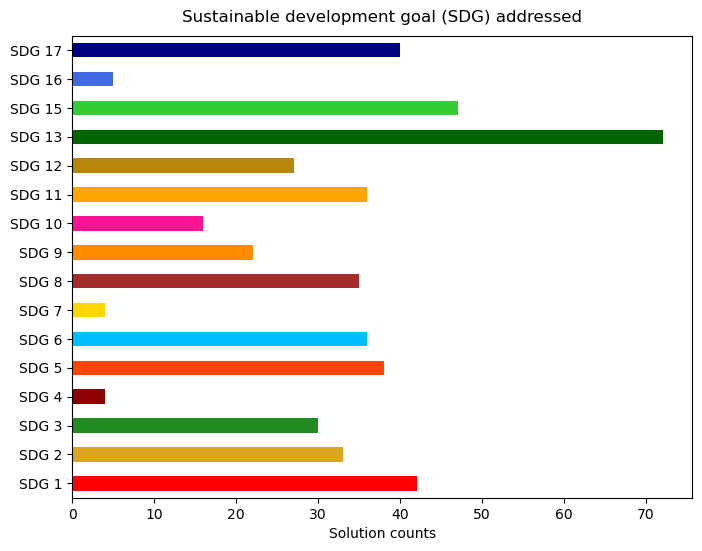

In [153]:
title='Sustainable development goal (SDG) addressed'
xlabel='Solution counts'
ax = df_UN.loc[:, df_UN.columns.str.startswith('SDG')].sum().plot.barh(color = c,figsize = (8,6))

#ax = df2.iloc[:,68:84].sum().plot.barh(color = c,figsize = (8,6))
ax.set(xlabel=xlabel)
ax.set_title(label = title)
ax.set_title(label = title, fontsize = 12, pad=10)
ax.tick_params(axis='both', labelsize=10)
#ax.tick_params(axis='x')
figure_name = 'SDG_Addressed'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.savefig(file_path_2 + figure_name + '.svg')
plt.show()
del ax

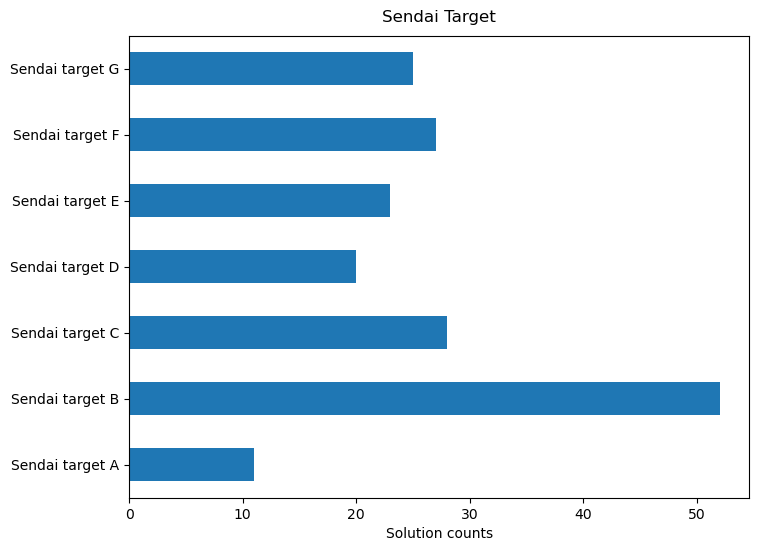

In [199]:
title='Sendai Target'
xlabel='Solution counts'
ax = df_UN.loc[:, df_UN.columns.str.startswith('Sendai')].sum().plot.barh(figsize = (8,6))
ax.set(xlabel=xlabel)
ax.set_title(label = title)
ax.set_title(label = title, fontsize = 12, pad=10)
ax.tick_params(axis='both', labelsize=10)
#ax.tick_params(axis='x')
figure_name = 'SendaiTarget'
plt.savefig(
    file_path_2 + figure_name + '.svg',
       bbox_inches='tight', dpi = 400)
plt.show()
del ax

In [205]:
from pycountry_convert import  country_alpha2_to_continent_code, country_alpha3_to_country_alpha2,country_name_to_country_alpha2,country_name_to_country_alpha3

In [206]:
df2['Solution location'] = df2['Solution location'].str.capitalize()

In [207]:
df2[df2['What were the other countries?'] != 'NAN']

,Title,Body,Solution location,Was the solution implemented in more than one country?,What were the other countries?,Mountain range,Climate impact time-scale(s),Performance evaluation,Long term project sustainability and maintenance,Solution scale:Global,...,SDG 9,code,Countries,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6
0,Sustainable watershed management in glacial mo...,The Glaciares+ project was led by NGO CARE Per...,Peru,No,NaN,Andes,Slow Onset;;Rapid Onset,NaN,Glaciares+ long-term sustainability comes from...,0,...,0,PER,Peru,Peru,None,None,None,None,None,None
1,Assessing the Economic Impacts of Disasters al...,This World Bank and Global Facility for Disast...,Tajikistan,No,NaN,Pamir Mountains,Slow Onset;;Rapid Onset,NaN,This project took into account future climate ...,0,...,1,TJK,Tajikistan,Tajikistan,None,None,None,None,None,None
2,"Renewing the flow of water in Mireshelli, Azer...",This project was part of the “Integrated Rural...,Azerbaijan,No,NaN,Lesser Caucasus,Slow Onset,NaN,"About 1,500 Khariz are thought to have existed...",0,...,0,AZE,Azerbaijan,Azerbaijan,None,None,None,None,None,None
3,As good as new: Rehabilitating irrigation syst...,This project involved the collaborative effort...,Azerbaijan,No,NaN,Talish Mountains,Slow Onset,NaN,Rehabilitating irrigation systems can be an im...,0,...,0,AZE,Azerbaijan,Azerbaijan,None,None,None,None,None,None
4,Restoring lost water resources in the Shirak r...,This solution was supported by the EU-financed...,Armenia,No,NaN,Lesser Caucasus,Rapid Onset,NaN,NaN,0,...,0,ARM,Armenia,Armenia,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,The Winter Preparedness and Avalanche Readines...,The Winter Preparedness and Avalanche Readines...,Afghanistan,Yes,Pakistan;;Tajikistan,"Pamir, Karakoram, Himalaya",Rapid Onset,Detailed impact analysis has not been done but...,"ClimSnow is jointly operated by Dianeige, Mété...",0,...,1,AFG,"Afghanistan,Pakistan,Tajikistan",Afghanistan,Pakistan,Tajikistan,None,None,None,None
84,"ClimSnow, a novel climate service to inform sk...",ClimSnow is a climate service developed to inf...,France,Yes,Andorra;;Spain,"French Alps, Pyrenees, Jura",Slow Onset;;Rapid Onset,The performance of ClimSnow has not been evalu...,The municipality is in charge of the maintenan...,0,...,1,FRA,"France,Andorra,Spain",France,Andorra,Spain,None,None,None,None
85,Co-designed nature-based solution in Nocera In...,This nature-based solution sought to reduce la...,Italy,No,NaN,Monti Lattari,Slow Onset;;Rapid Onset,No information available,No information is available regarding environm...,0,...,0,ITA,Italy,Italy,None,None,None,None,None,None
86,Nature-based “carrots and sticks” solution,This nature-based solution focuses primarily o...,China,No,NaN,Qionglai Mountains in Western Sichuan province...,Slow Onset;;Rapid Onset,Intensive semi-annual evaluations are conducte...,Multiple gender-balanced stakeholder-led commi...,0,...,0,CHN,China,China,None,None,None,None,None,None


In [208]:
df2['What were the other countries?'].dropna()

20                                       Rwanda;;Uganda
38                                                Sudan
52                   Argentina;;Bolivia;;Chile;;Ecuador
61                                          Philippines
62                          Bangladesh;;Nepal;;Pakistan
68                    Bolivia;;Burundi;;Nepal;;Pakistan
71                                             Colombia
73    Argentina;;Bolivia;;Chile;;Ecuador;;Peru;;Vene...
82        Andorra;;Austria;;Germany;;Italy;;Switzerland
83                                 Pakistan;;Tajikistan
84                                       Andorra;;Spain
87                             Congo (Kinshasa);;Rwanda
Name: What were the other countries?, dtype: object

In [209]:
#for i, row in df10.iterrows():    
code = []
for p in df2['Solution location'].str.capitalize():
    try:
        aa = country_name_to_country_alpha3(p)
        code.append(aa)
    except:
        code.append('')
df2['code'] = code

In [210]:
def try_concat(x, y):
    try:
        return str(x) + ' ;; ' + y
    except (ValueError, TypeError):
        return x

In [211]:
df2['Countries'] = [try_concat(x, y) for x, y in zip(df2['Solution location'], df['What were the other countries?'])]

In [212]:
df2['Countries'] = df2['Countries'].str.replace(';;',',')

In [213]:
df2['Countries'] = df2['Countries'].str.replace(' , ',',') 

In [214]:
df2['Countries'].str.split(',', expand=True)
new = df2["Countries"].str.split(",", n = -1, expand = True)
df2[['Country_' + str(i) for i in range(new.shape[1])]] = new
#df2 = df2.replace({np.nan: None})
#df.drop('Climate impact(s) addressed', axis = 1, inplace=True)
del new

In [215]:
df2.replace(to_replace='Congo (Kinshasa)', value='Democratic Republic of the Congo',inplace= True)

In [216]:
df2.replace(to_replace='South sudan', value='South Sudan',inplace= True)

In [217]:
df11 = pd.concat([df2['Country_0'],df2['Country_1'],df2['Country_2'],df2['Country_3'],df2['Country_4'],
           df2['Country_5'],df2['Country_6']]).value_counts(ascending=False).rename_axis('countries').to_frame('counts')

In [218]:
df11.reset_index(inplace = True)

In [219]:
df12 = pd.concat([df2['Country_0'],df2['Country_1'],df2['Country_2'],df2['Country_3'],df2['Country_4'],
           df2['Country_5'],df2['Country_6']]).rename_axis('solutions').to_frame('countries')

In [220]:
result = pd.concat([df12, df2], axis=1)

In [221]:
cf = result.groupby('countries').sum()

In [222]:
cf.reset_index(inplace = True)

In [223]:
#for i, row in df10.iterrows():    
code = []
continents = []
for p in cf.countries:
    try:
        aa = country_name_to_country_alpha3(p)
        b1 = country_name_to_country_alpha2(p)
        bb = country_alpha2_to_continent_code(b1)
        code.append(aa)
        continents.append(bb) 
    except:
        code.append('')
        continents.append('')   
cf['code'] = code
cf['continents'] = continents

In [224]:
cf.set_index('countries', inplace=True)

In [225]:
cf.rename(index = {'Democratic Republic of the Congo': 'DR Congo'},inplace= True)

In [256]:
scale = cf.loc[:,cf.columns.str.startswith('Climate Impact')]
#cols = ['Solution scale:global', 'Solution scale:trans-boundary', 'Solution scale:national', 
#        'Solution scale:sub-national / regional','Solution scale:local']

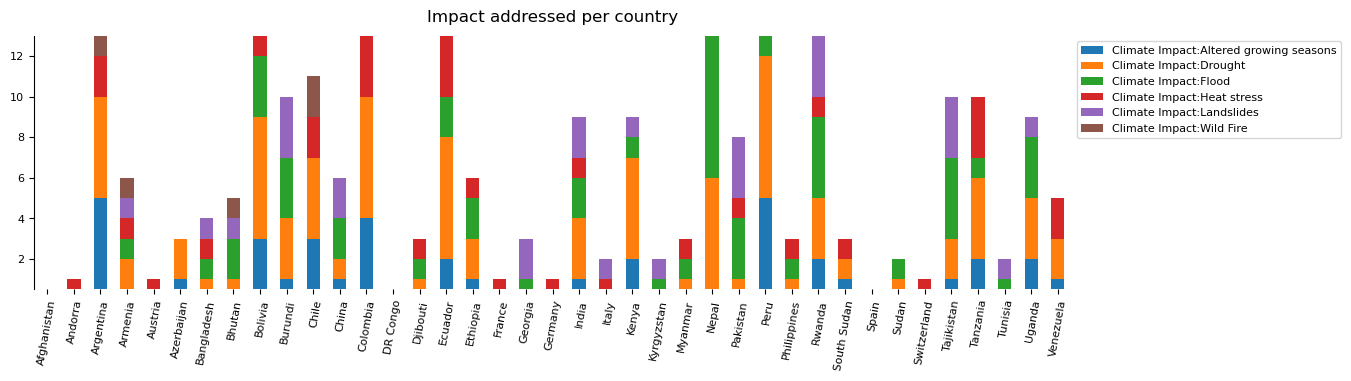

In [257]:
#Solution per continent / we don't use this figure
title='Impact addressed per country'                                                          
ax = scale.plot.bar(stacked=True, figsize = (12,5),width=0.5)
ax.set(ylabel=None)
ax.set(xlabel=None)
#ax.set_title(label = title)
ax.set_title(label = title, fontsize = 12, pad = 10)
ax.tick_params(axis='both', labelsize=8)
ax.set_ylim(0.5, 13)
#for c in ax.containers:
#    ax.bar_label(c, label_type='center', padding=4,fontsize=8,color='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', rotation_mode="anchor")

#for p in ax.patches:
#    left, bottom, width, height = p.get_bbox().bounds
#    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
#                ha='center', va='center')
sns.despine(bottom=True)
plt.tight_layout(pad=5)
figure_name = 'Solution scale per country'
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize = 8)
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.show()

In [ ]:
cf.iloc[:,14:21].sum()

In [242]:
ccf = cf.groupby('continents').sum()

In [243]:
ccf.rename(index={'AF':'Africa', 'AS' : 'Asia', 'SA': 'South America', 'EU' : 'Europe'}, inplace=True)

In [263]:
ccf

,Solution scale:Global,Solution scale:Local,Solution scale:National,Solution scale:Sub-national / Regional,Solution scale:Trans-Boundary,Ecosystem:Agricultural land,Ecosystem:Forest,Ecosystem:Grassland,Ecosystem:High Alpine,Ecosystem:Lakes and rivers,...,SDG 17,SDG 1,SDG 2,SDG 3,SDG 4,SDG 5,SDG 6,SDG 7,SDG 8,SDG 9
continents,,,,,,,,,,,,,,,,,,,,,
Africa,2,12,5,18,3,21,21,10,4,9,...,7,15,14,5,1,11,7,1,15,1
Asia,2,21,12,18,4,24,18,8,23,17,...,14,14,14,14,5,20,15,2,15,15
Europe,0,11,0,1,0,4,4,4,9,1,...,2,7,6,10,0,0,0,1,7,3
South America,1,16,1,19,7,13,25,19,27,13,...,31,17,8,16,1,14,19,1,8,8


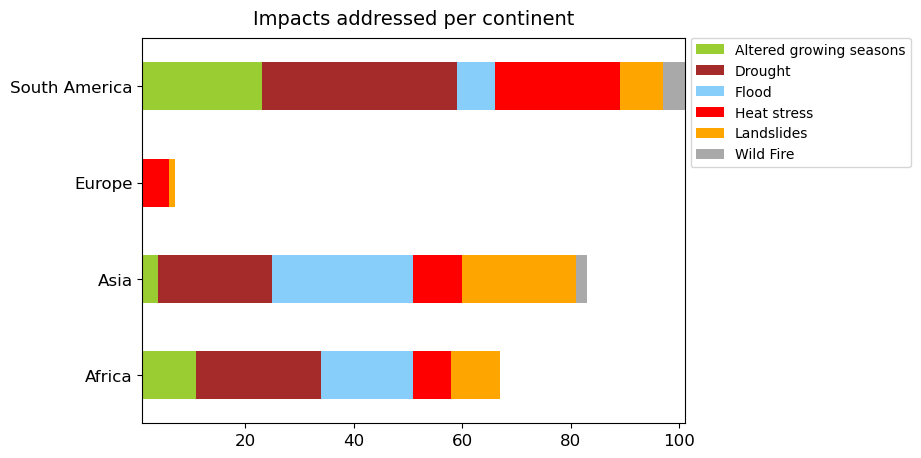

In [311]:
#Solution per continent
title='Impacts addressed per continent'
#xlabel = 'Solutions'
#order = ['Altered growing seasons', 'Drought', 'Flood','Heat stress','Landslides','Wild Fire', 'Others']
#c = ['gold', 'lightblue', 'green', 'grey']
xx = ccf.loc[:,ccf.columns.str.startswith('Climate Impact')]
xx.columns = xx.columns.str.split(split_character).str[-1]

#ax = ccf.loc[:,ccf.columns.str.startswith('Climate Impact')].plot.barh(stacked=True, figsize = (10,6), color = c)
                                 
c=['yellowgreen', 'brown', 'lightskyblue', 'red', 'orange', 'darkgrey']                                 #                                    'plum'], width= 0.5)

ax = xx.plot.barh(stacked=True, figsize = (7,5), color = c)       
ax.set(ylabel=None)
#ax.set_title(label = title)
ax.set_title(label = title, fontsize = 14, pad = 10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(1, 101)
#for c in ax.containers:
#    ax.bar_label(c, label_type='center', padding=0.3,fontsize=8,color='black')


#for p in ax.patches:
#    left, bottom, width, height = p.get_bbox().bounds
#    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
#                ha='center', va='center')
figure_name = 'Climate impact per continent'
plt.legend(loc='upper right', bbox_to_anchor=(1.43, 1.02), fontsize = 10)
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.show()

In [191]:
#for i, row in df10.iterrows():    
code = []
continents = []
for p in df11.countries:
    try:
        aa = country_name_to_country_alpha3(p)
        b1 = country_name_to_country_alpha2(p)
        bb = country_alpha2_to_continent_code(b1)
        code.append(aa)
        continents.append(bb) 
    except:
        code.append('')
        continents.append('')   
df11['code'] = code
df11['continents'] = continents